In [70]:
import csv
f= open('Fish.csv', 'r')
data = csv.reader(f)

header = next(data)

bream_weight = [] #도미 무게
bream_length = [] #도미 길이
smelt_weight = [] #빙어 무게
smelt_length = [] #도미 길이

for row in data:
    if row[0] == "Bream":
        bream_weight.append(float(row[1]))
        bream_length.append(float(row[3]))
    if row[0] == "Smelt":
        smelt_weight.append(float(row[1]))
        smelt_length.append(float(row[3]))
        
f.close()

fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight

import numpy as np
#fish_data = [[l,w] for l,w in zip(fish_length, fish_weight)]

fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

print('fish_data: ',fish_data)
print('fish_target:', fish_target)

fish_data:  [[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
fish_target: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [71]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)


In [72]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

In [73]:
kn.fit( train_input, train_target )
kn.score(test_input, test_target)

1.0

In [76]:
print(kn.predict([[25,150]]))

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr.shape)
print(target_arr.shape)

[0.]
(49, 2)
(49,)


In [36]:
np.random.seed(42)

index = np.arange(0,49)

np.random.shuffle(index)

In [49]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]


print(train_input)
print(input_arr[13])

[[  32.   340. ]
 [  12.4   13.4]
 [  14.3   19.7]
 [  12.2   12.2]
 [  33.   700. ]
 [  36.   714. ]
 [  35.   720. ]
 [  35.   725. ]
 [  38.5  955. ]
 [  33.5  650. ]
 [  31.5  500. ]
 [  29.   430. ]
 [  41.   950. ]
 [  30.   450. ]
 [  29.   363. ]
 [  29.7  500. ]
 [  11.3    8.7]
 [  11.8   10. ]
 [  13.    12.2]
 [  32.   600. ]
 [  30.7  500. ]
 [  33.   700. ]
 [  35.   700. ]
 [  41.   975. ]
 [  38.5  920. ]
 [  25.4  242. ]
 [  12.     9.8]
 [  39.5  925. ]
 [  29.7  450. ]
 [  37.  1000. ]
 [  31.   500. ]
 [  10.5    7.5]
 [  26.3  290. ]
 [  34.   685. ]
 [  26.5  340. ]]
[ 32. 340.]


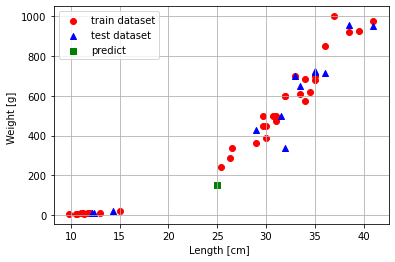

In [86]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1], label='train dataset', c='r')
plt.scatter(test_input[:,0], test_input[:,1], label = 'test dataset',c='b', marker='^')
plt.scatter(25,150, label = 'predict',c='g', marker='s')
plt.grid(True)
plt.ylabel('Weight [g] ')
plt.xlabel('Length [cm] ')
plt.legend()
plt.show()

[[ 92.00086956 130.48375378 138.32150953 140.00603558 140.62090883]]
[[12 29  5 19  4]]


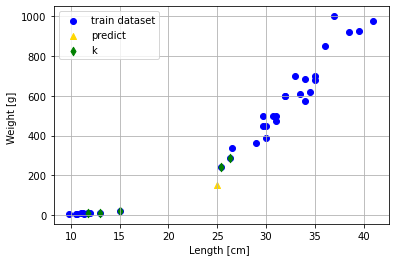

In [89]:
distances, indexes = kn.kneighbors([[25,150]])

print(distances)
print(indexes)

plt.scatter(train_input[:,0], train_input[:,1], label='train dataset', c='b')
plt.scatter(25,150, label = 'predict',c='gold', marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1] ,label='k', c='g', marker='d')
plt.grid(True)
plt.ylabel('Weight [g] ')
plt.xlabel('Length [cm] ')
plt.legend()
plt.show()

In [98]:
#데이터전처리
kn.predict([[25,150]])
#아직 빙어로 판별하는중

mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

train_scaled = (train_input - mean) / std 
test_scaled = (test_input - mean) / std
# print(train_scaled)
#sample 데이터도 바꿔줌

sample = ([25,150] - mean) / std

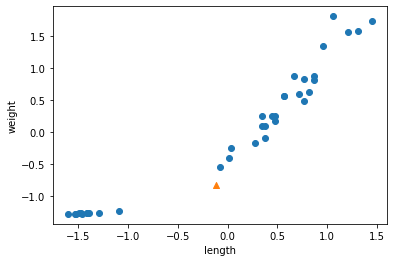

In [99]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(sample[0], sample[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [100]:
#샘플링 편향 문제 해결

kn.fit(train_scaled, train_target)
kn.predict([sample])
kn.score(test_scaled, test_target)

1.0